In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('CO2 Emissions_Canada.csv')

# take a look at the dataset
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
# summarize the data
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [4]:
cdf = df[['Engine Size(L)','Cylinders','Fuel Consumption Comb (mpg)','CO2 Emissions(g/km)']]
cdf.head(9)

,Engine Size(L),Cylinders,Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,33,196
1,2.4,4,29,221
2,1.5,4,48,136
3,3.5,6,25,255
4,3.5,6,27,244
5,3.5,6,28,230
6,3.5,6,28,232
7,3.7,6,25,255
8,3.7,6,24,267


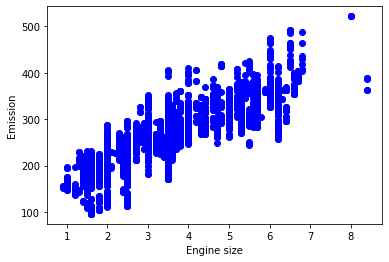

In [7]:
plt.scatter(cdf["Engine Size(L)"], cdf["CO2 Emissions(g/km)"],  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [8]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
#train and test are Dfs

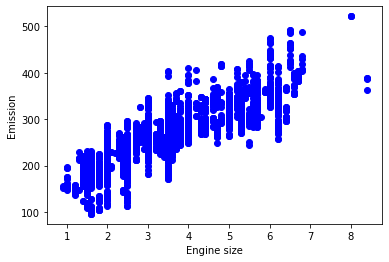

In [9]:
plt.scatter(train["Engine Size(L)"], train["CO2 Emissions(g/km)"],  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [10]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Engine Size(L)','Cylinders','Fuel Consumption Comb (mpg)']])
y = np.asanyarray(train[['CO2 Emissions(g/km)']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 7.25164719  7.73959172 -4.93170401]]


In [11]:
from sklearn.metrics import r2_score

y_hat= regr.predict(test[['Engine Size(L)','Cylinders','Fuel Consumption Comb (mpg)']])
x = np.asanyarray(test[['Engine Size(L)','Cylinders','Fuel Consumption Comb (mpg)']])
y = np.asanyarray(test[['CO2 Emissions(g/km)']])
print("Residual sum of squares (MSE): %.2f"
      % np.mean((y_hat - y) ** 2))
print("R2-score: %.2f" % r2_score(y_hat , y) )

# Explained variance score: 1 is perfect prediction
print('Explained Variance score: %.2f' % regr.score(x, y))

Residual sum of squares (MSE): 348.81
R2-score: 0.88
Explained Variance score: 0.89


In [12]:
x1 = np.asanyarray(train[['Engine Size(L)','Cylinders','Fuel Consumption Comb (mpg)']])
y1 = np.asanyarray(train[['CO2 Emissions(g/km)']])
regr.fit (x1, y1)

y1_hat= regr.predict(test[['Engine Size(L)','Cylinders','Fuel Consumption Comb (mpg)']])
x1 = np.asanyarray(test[['Engine Size(L)','Cylinders','Fuel Consumption Comb (mpg)']])
y1 = np.asanyarray(test[['CO2 Emissions(g/km)']])
print("Residual sum of squares: %.2f"
      % np.mean((y1_hat - y1) ** 2))

# Explained variance score: 1 is perfect prediction
print('Explained Variance score: %.2f' % regr.score(x1, y1))

Residual sum of squares: 348.81
Explained Variance score: 0.89
